#### BBC Articles Text Analysis

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  classification_report



In [2]:
#Read the CSV and check the structure
df = pd.read_csv("bbc_text_cls.csv")

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


#### Explore the data

C:\Users\USER\AppData\Local\Temp\ipykernel_15020\1303550660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="labels", data=df, palette="viridis", order=df["labels"].value_counts().index, legend=False)


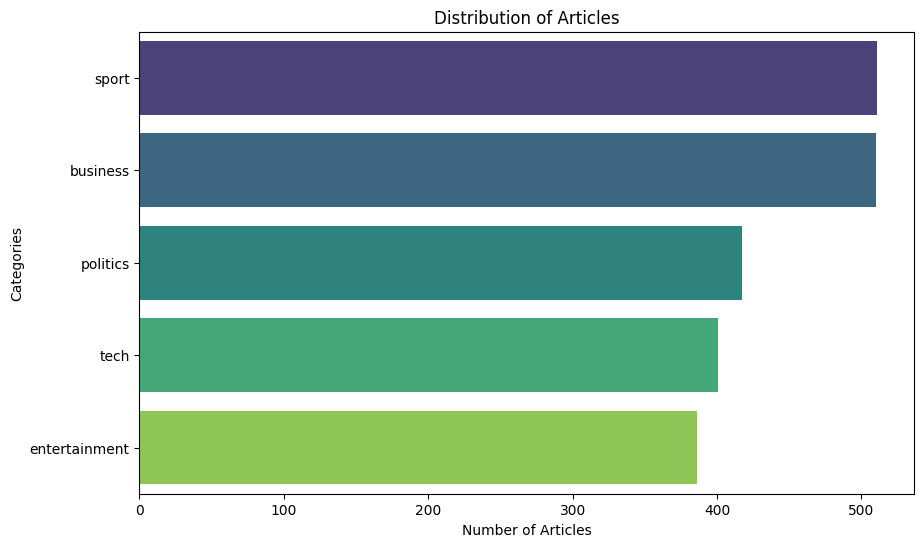

In [4]:
#The dataset contains 2 columns,  labels that contains the categories of the articles while the text contains the content of the article.
#Let's see the distribution of the article categories
#plot the the distribution of the articles
plt.figure(figsize=(10,6))
sns.countplot(y="labels", data=df, palette="viridis", order=df["labels"].value_counts().index, legend=False)
plt.xlabel("Number of Articles")
plt.ylabel("Categories")
plt.title("Distribution of Articles")
plt.show();

In [5]:
#Split dataset into training and testing sets
X = df["text"]
y = df["labels"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#Vectorizing using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7, max_features=5000)
X_train_1 = vectorizer.fit_transform(X_train)
X_test_1 = vectorizer.transform(X_test)

#### Build text classification models using Logistic regression and multinomial naive bayes


In [6]:
#instantiate and train model
model_1 = LogisticRegression()
model_1.fit(X_train_1, y_train)
#Make predictions
y_pred = model_1.predict(X_test_1)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97       115
entertainment       0.99      0.97      0.98        72
     politics       0.95      0.97      0.96        76
        sport       1.00      0.99      1.00       102
         tech       0.97      0.97      0.97        80

     accuracy                           0.98       445
    macro avg       0.97      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [7]:
#Instantiate multinomial naive bayes and train
model_2 = MultinomialNB()
model_2.fit(X_train_1, y_train)
#Make predictions
y_pred = model_2.predict(X_test_1)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       115
entertainment       0.99      0.96      0.97        72
     politics       0.94      0.97      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.95      0.99      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

